Fontes: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# Visualização de dados com Matplotlib

O matplotlib é uma biblioteca para criação de visualizações de dados em Python.

Para desenvolver alguma visualização, geramente é utilizada uma interface que é disponível em `matplotlib.pyplot` e geralmente é apelidado de `plt`.

Então, geralmente o `import` realizado é o seguinte:

In [ ]:
import matplotlib.pyplot as plt

## Gráficos

Para fazer gráficos na matplotlib é preciso compreender as classes `Figure` e `Axes`. A tradução dessas classes seriam `Figura` e `Eixos`. Devemos tomar cuidado para não confundir o significado de eixo para não confundir com eixo de coordenadas (como os famosos eixos x e y). Eixo aqui se refere mais a uma linha imaginária na qual coisas rodam em volta.

Em outras palavras, é como se definirmos uma linha que serve de referência para inserirmos objetos, como o desenho de uma linha de coordenada, um ponto de dado, um texto, etc.

A matplotlib desenha os visuais sobre Figuras e cada Figura pode conter um ou mais Eixos (cada eixo geralmente será um gráfico). No eixo é que especificamos os pontos nas coordenadas x-y, por exemplo.

Exemplo: Foram medidos temperaturas em 4 dias seguidos. Cada dia foi identificado pelo dia da medição: 1, 2, 3 e 4. Os resultados obtidos pelas medições foram: 20.3, 24.6, 18.4 e 30.1.

Podemos representar esses dados como 4 pares (dia, medição), com dia na coordenada x e medição na coordenada y. Para visualizar esses dados desenhar um gráfico de linhas (pois o eixo x é temporal).

Os pares são: (1, 20.3), (2, 24.6), (3, 18.4) e (3, 30.1).


Obs.: Poderia ser montada uma tabela com duas colunas para representar os mesmos dados.

In [ ]:
# Cria uma lista com os dias
dias = [1, 2, 3, 4]

# Cria uma lista com as medições de temperatura
temperaturas = [20.3, 24.6, 18.4, 30.1]

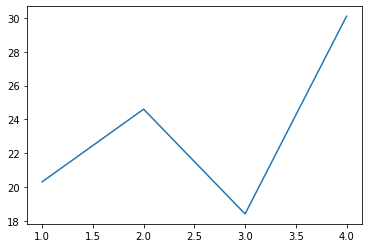

In [ ]:
# Cria uma figura contendo um único eixo
# fig é o objeto Figure e ax o objeto Axes
fig, ax = plt.subplots()

# Os objetos do gráfico são desenhados no eixo
# Quando é chamado o método plot é desenhado um gráfico y por x
# como linhas e/ou marcadores
# Para isso é preciso passar os valores x e os valores y:
ax.plot(dias, temperaturas)

Uma observação nesse ponto é que existem basicamente dois estilos para trabalhar com a matplotlib:

- Orientada a objetos: estilo que foi visto no exemplo acima. Os objetos `Figures` e `Axes` são manipulados explicitamente chamando os **métodos** dessas classes;

- Pela interface `pyplot`: estilo baseado em estados (inspirado pelo MATLAB) na qual são utilizadas **funções** da interface.

Não existe um estilo melhor que outro, somente a boa prática de escolher um deles. Ou seja, não misturar os dois estilos ao utilizarmos a biblioteca.

O código no estilo da interface equivalente ao anterior é o seguinte:

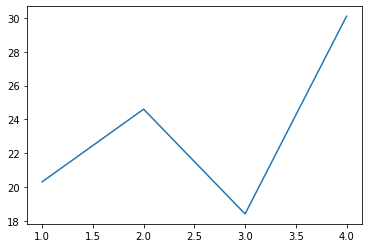

In [ ]:
plt.plot(dias, temperaturas)

Uma dica ao buscar dicas e códigos é reparar no estilo utilizado pelo autor. Ao adaptar para o código desenvolvido, fazer a adaptação caso a fonte utilize o outro estilo.

O restante deste texto utilizará o estilo orientado a objetos.

Uma referência bastante útil é: https://matplotlib.org/gallery/showcase/anatomy.html

Contém os principais componentes de uma `Figure` que agiliza a busca do que é necessário configurar, como uma legenda, rótulos de eixos, entre outros.

## Tipos de entrada de dados

Todas as funções de desenho de gráficos esperam `numpy.array`ou `numpy.ma.masked_array` como entrada.

Classes que são parecidas com arrays do numpy, como os objetos do pandas podem não trabalhar como esperado.

Então é melhor converter para objetos `numpy.array` antes de desenhar o gráfico.

Como exemplo, vamos criar um `DataFrame` com os dados do exemplo anterior e fazer a conversão.

In [ ]:
import pandas as pd
medicoes = pd.DataFrame({'Dia': dias, 'Temperatura': temperaturas})
medicoes

,Dia,Temperatura
0,1,20.3
1,2,24.6
2,3,18.4
3,4,30.1


In [ ]:
# O DataFrame do pandas é uma classe parecida com arrays do numpy
type(medicoes)

pandas.core.frame.DataFrame

In [ ]:
# Mas tem um método que converte para um array (na verdade um ndarray que é um array multidimensional)
medicoes['Dia'].to_numpy()

array([1, 2, 3, 4])

In [ ]:
type(medicoes['Dia'].to_numpy())

numpy.ndarray

In [ ]:
medicoes['Temperatura'].to_numpy()

array([20.3, 24.6, 18.4, 30.1])

In [ ]:
type(medicoes['Temperatura'].to_numpy())

numpy.ndarray

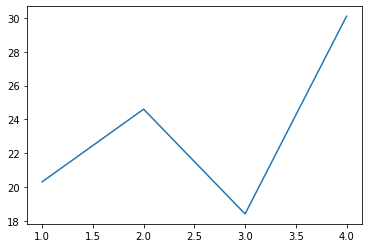

In [ ]:
# Então é melhor usar esses arrays para desenhar gráficos:
fig, ax = plt.subplots()
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy())

Observação: existem outras formas de converter, selecionar e escrever a mesma coisa.

## Configurações comuns de gráficos

Obs.: Para as configurações a seguir, existem configurações adiconais, como cores e tamanhos, as quais podem ser vitas nas documentações respectivas.

### Tamanho da figura

https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=set_size_inches#matplotlib.figure.Figure.set_size_inches

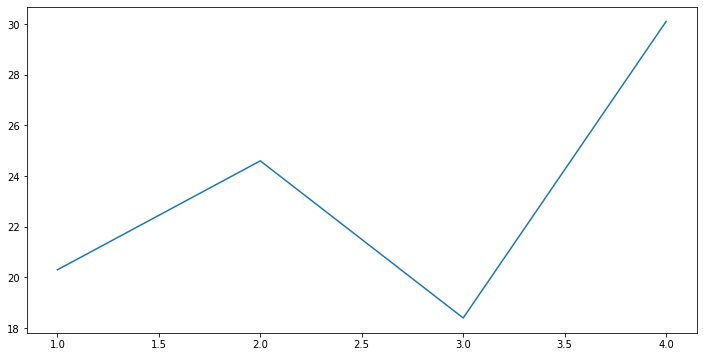

In [ ]:
fig, ax = plt.subplots()
# Alteramos o tamanho da Figura
fig.set_size_inches(12, 6)
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy())

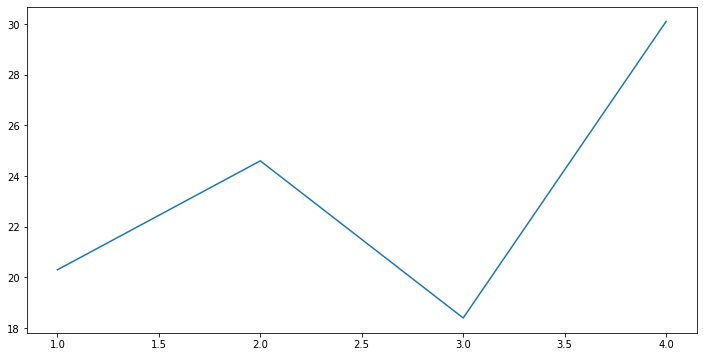

In [ ]:
# Pode ser feita também quando se chama o subplots
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy())

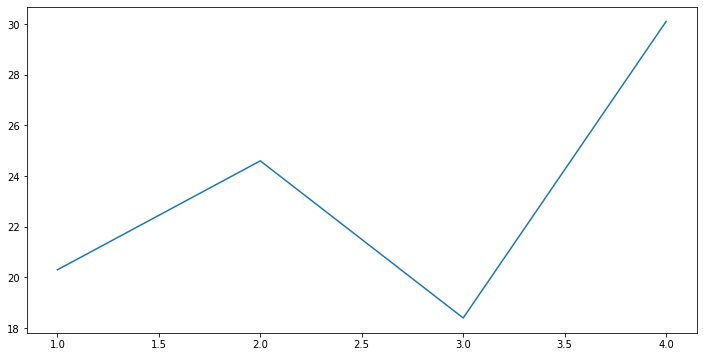

In [ ]:
# Observação: para omitir o texto imprimido acima do gráfico, usamos o ;
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

### Títulos

#### Título da Figura

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html

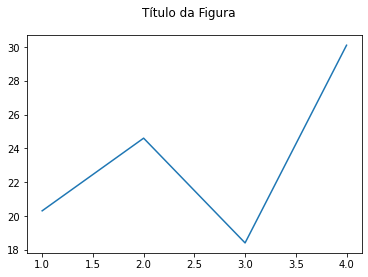

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Título da Figura')
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

#### Título dos Axes

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html

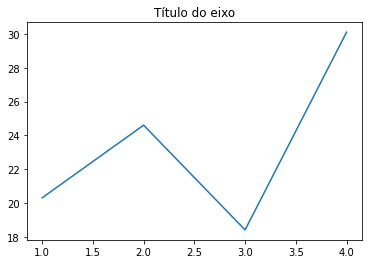

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Título do eixo')
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

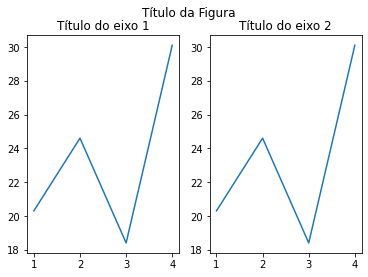

In [ ]:
# Para ver a diferença entre eles, vamos fazer uma
# Figura com dois Eixos e colocar os títulos.
# 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2) # Obs: Devolve um array com n = 1 x 2 = 2 eixos
fig.suptitle('Título da Figura')
ax1.set_title('Título do eixo 1')
ax1.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());
ax2.set_title('Título do eixo 2')
ax2.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

### Nomes dos eixos de coordenadas (rótulos dos eixos x e y)

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html?highlight=set_xlabel#matplotlib.axes.Axes.set_xlabel

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html?highlight=set_ylabel#matplotlib.axes.Axes.set_ylabel

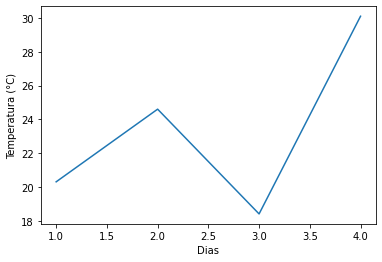

In [ ]:
fig, ax = plt.subplots()
# Define o rótulo do eixo x
ax.set_xlabel('Dias')
# Define o rótulo do eixo y
ax.set_ylabel('Temperatura (°C)')
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

### Grids (linhas verticais e/ou horizontais)

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html?highlight=grid#matplotlib.axes.Axes.grid

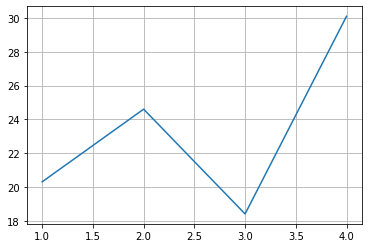

In [ ]:
fig, ax = plt.subplots()
# Insere linhas horizontais e verticais
ax.grid()
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

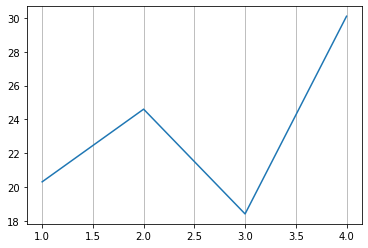

In [ ]:
fig, ax = plt.subplots()
# Insere somente linhas verticais
ax.grid(axis='x')
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

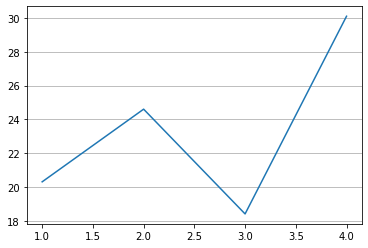

In [ ]:
fig, ax = plt.subplots()
# Insere somente linhas horizontais
ax.grid(axis='y')
ax.plot(medicoes['Dia'].to_numpy(), medicoes['Temperatura'].to_numpy());

### Aplicando algumas das configurações acima

A seguir iremos aplicar algumas das configurações vistas acima, junto com parâmetros adicionais disponíveis nas documentações citadas.

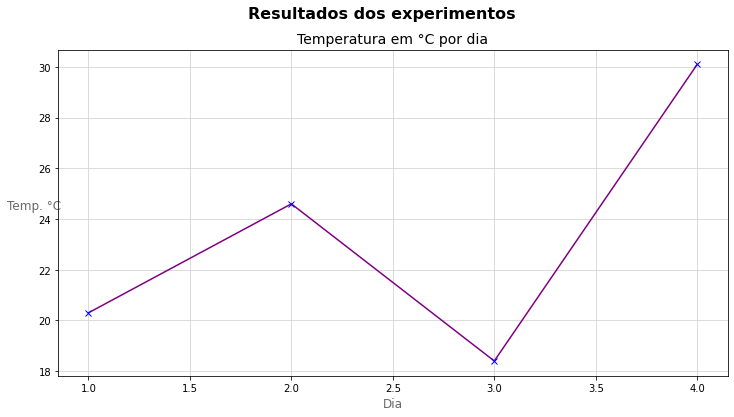

In [ ]:
fig, ax = plt.subplots()
# Altera o tamanho da figura
fig.set_size_inches(12, 6)

# Define um título para a figura em negrito e tamanho de fonte 16
fig.suptitle('Resultados dos experimentos', fontsize=16, weight='bold')

# Define um título para o eixo com tamanho de fonte 14
ax.set_title('Temperatura em °C por dia', fontsize=14)

# Define um rótulo para o eixo x com tamanho de fonte 12 e na cor cinza escuro
ax.set_xlabel('Dia', fontsize=12, color='dimgray')

# Define um rótulo para o eixo y com tamanho de fonte 12, na cor cinza escuro e escrito
# na horizontal (o padrão é na vertical)
ax.set_ylabel('Temp. °C', fontsize=12, color='dimgray', rotation='horizontal')

# Insere as linhas de grid na cor cinza claro
ax.grid(color='lightgrey')

# Insere a linha do gráfico na cor roxa com marcadores dos pontos como um x
# na cor azul
ax.plot(medicoes['Dia'].to_numpy(),
        medicoes['Temperatura'].to_numpy(),
        color='purple',
        marker='x',
        markeredgecolor='blue',
        marker);